In [2]:
import os
import pandas as pd
from glob import glob
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import seaborn as sns 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [4]:
train_path = "C:\\Users\\Rochak\\Desktop\\UI (1)\\UI\\Training\\output\\train"
test_path  = "C:\\Users\\Rochak\\Desktop\\UI (1)\\UI\\Training\\output\\test"
val_path = "C:\\Users\\Rochak\\Desktop\\UI (1)\\UI\\Training\\output\\val"

In [5]:
os.listdir(val_path)

['+',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '=',
 'div',
 'X',
 'y',
 'z']

In [18]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\1'):
    
    img = imread(test_path+'\\1'+'\\'+image_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\Rajan_Ghimire\miniconda3\envs\tf36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



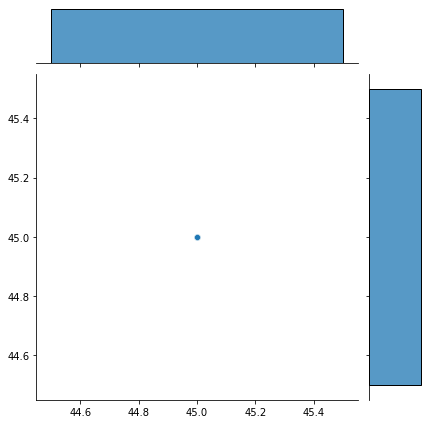

In [20]:
sns.jointplot(dim1,dim2)

In [34]:
image_shape = (int(np.mean(dim1)),int(np.mean(dim2)),1)
print(image_shape)

(45, 45, 1)


In [30]:
folders=glob(test_path + '/*')
print(f"Total category in dataset is:: {len(folders)}")

Total category in dataset is:: 17


In [31]:
traindata_gen=ImageDataGenerator(
                             rotation_range=10,
                             rescale=1/255.,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             fill_mode='nearest'
                              )

testdata_gen=ImageDataGenerator(
                             
                             rescale=1/255.)

valdatagen = ImageDataGenerator(
                            rescale=1/255.
                    )

In [37]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape =image_shape))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(len(folders), activation = "softmax"))




# model = Sequential()

# model.add(Conv2D(filters=32, kernel_size=(5,5), strides=1, padding='same',input_shape=image_shape, activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(5,5), strides=1, padding='same',input_shape=image_shape, activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same',input_shape=image_shape, activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())

# model.add(Dense(512))
# model.add(Activation('relu'))

# model.add(Dropout(0.5))

# model.add(Dense(len(folders)))
# model.add(Activation('sigmoid'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 45, 45, 32)        832       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 45, 45, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 64)       

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [41]:
batch_size = 32
traning_set=traindata_gen.flow_from_directory(train_path,
                                              target_size =image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical')

testing_set=testdata_gen.flow_from_directory(test_path,
                                            target_size = image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical',
                                            shuffle=False)
val_set = valdatagen.flow_from_directory(val_path,
                                            target_size = image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical',
                                            shuffle=False )

Found 167308 images belonging to 17 classes.
Found 20928 images belonging to 17 classes.
Found 20906 images belonging to 17 classes.


In [42]:
testing_set.class_indices

{'+': 0,
 '-': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 '=': 12,
 'X': 13,
 'div': 14,
 'y': 15,
 'z': 16}

In [46]:
result = model.fit(
  traning_set,
  epochs=8,
  validation_data=testing_set,
  callbacks=[early_stop]
    
)

Epoch 1/8
5229/5229 [==============================] - 1444s 273ms/step - loss: 0.4598 - accuracy: 0.8638 - val_loss: 0.0710 - val_accuracy: 0.9808
Epoch 2/8
5229/5229 [==============================] - 221s 42ms/step - loss: 0.2058 - accuracy: 0.9412 - val_loss: 0.0709 - val_accuracy: 0.9812
Epoch 3/8
5229/5229 [==============================] - 174s 33ms/step - loss: 0.1731 - accuracy: 0.9509 - val_loss: 0.0506 - val_accuracy: 0.9866
Epoch 4/8
5229/5229 [==============================] - 172s 33ms/step - loss: 0.1521 - accuracy: 0.9566 - val_loss: 0.0557 - val_accuracy: 0.9854
Epoch 5/8
5229/5229 [==============================] - 174s 33ms/step - loss: 0.1424 - accuracy: 0.9590 - val_loss: 0.0458 - val_accuracy: 0.9884
Epoch 6/8
5229/5229 [==============================] - 180s 34ms/step - loss: 0.1319 - accuracy: 0.9623 - val_loss: 0.0447 - val_accuracy: 0.9888
Epoch 7/8
5229/5229 [==============================] - 180s 34ms/step - loss: 0.1291 - accuracy: 0.9632 - val_loss: 0.0464

In [48]:
model.save("17class.h5")

In [ ]:
history = result
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True , figsize=(20,5) , dpi = 200)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

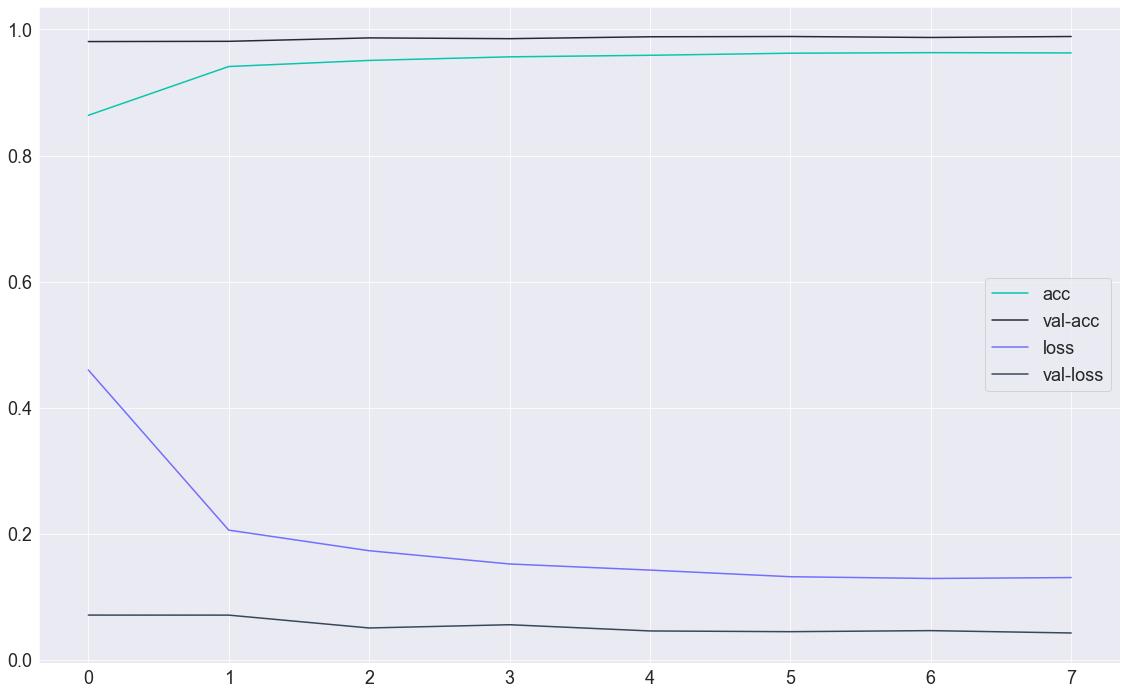

In [63]:
history = result
import matplotlib as mpl

sns.set_style('darkgrid') 
mpl.rcParams.update({ 'font.size': 18})

epochs = list(range(len(history.history['accuracy'])))

plt.figure(figsize=(16, 10)) 
sns.lineplot(x=epochs, y=history.history['accuracy'], label='acc', color='#08c6ab')
sns.lineplot(x=epochs, y=history.history['val_accuracy'], label='val-acc', color='#212b38') 
#plt.show()
#plt.figure(figsize=(16, 10)) 
sns.lineplot(x=epochs, y=history.history['loss'], label='loss', color='#726eff')
sns. lineplot(x=epochs, y=history.history['val_loss'], label='val-loss', color='#37465b') 
plt.tight_layout() 
# plt.savefig('../figures/lstm80-metrics.png')


In [79]:

val_set = valdatagen.flow_from_directory(val_path,
                                            target_size = image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical',
                                            shuffle=False )
test_steps_per_epoch = np.math.ceil(val_set.samples / val_set.batch_size)

predictions = model.predict(val_set, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = val_set.classes
class_labels = list(val_set.class_indices.keys())   

from sklearn.metrics import  classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

           +       1.00      1.00      1.00      2511
           -       1.00      1.00      1.00      3399
           0       1.00      0.99      1.00       691
           1       1.00      1.00      1.00      2652
           2       0.98      0.98      0.98      2614
           3       1.00      0.99      1.00      1090
           4       0.99      0.99      0.99       739
           5       0.99      0.99      0.99       354
           6       1.00      1.00      1.00       311
           7       0.99      0.98      0.98       290
           8       0.98      0.99      0.99       306
           9       0.96      0.97      0.97       373
           =       1.00      0.99      0.99      1310
           X       1.00      1.00      1.00      2659
         div       1.00      0.95      0.98        86
           y       0.98      0.98      0.98       934
           z       0.93      0.89      0.91       587

    accuracy              

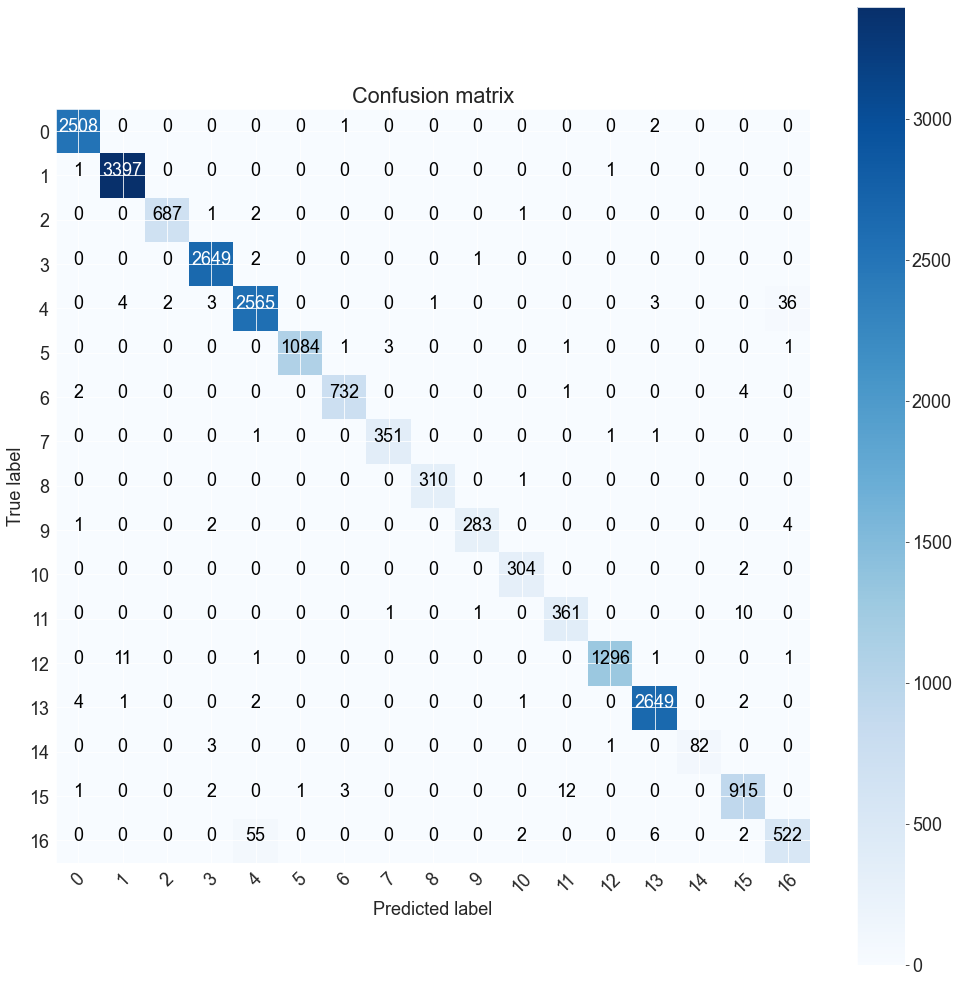

In [80]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# compute the confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes) 
# plot the confusion matrix

plt.figure(figsize=(14, 14))
plot_confusion_matrix(confusion_mtx, classes = range(len(folders))) 